In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd

## 1.从数组创建数据集dataset

In [4]:
# Step-1： 数据集实例化  dataset = tf.data.Dataset.from_tensor_slices(your real data)
input_data = np.arange(9)
dataset = tf.data.Dataset.from_tensor_slices(input_data)

In [5]:
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [11]:
# Step-2: 创建数据集的迭代器 dataset.make_one_shot_iterator(), 每次返回一个张量数据
iterator = dataset.make_one_shot_iterator()

In [12]:
# Step-3：创建数据遍历器get_next() 处理数据
x = iterator.get_next()

In [13]:
y = x*x

In [16]:
with tf.Session() as sess:
    print(sess.run(y))
    print(sess.run(y))
    print(sess.run(y))

0
1
4


#### 首先， tf.data.Dataset.from_tensor_slices 函数会创建一个代表数组切片的 tf.data.Dataset。系统会在第一个维度内对该数组进行切片。例如，一个包含 MNIST 训练数据的数组的形状为 (60000, 28, 28)。将该数组传递给 from_tensor_slices 会返回一个包含 60000 个切片的 Dataset 对象，其中每个切片都是一个 28x28 的图像

In [23]:
dataset1 = tf.data.Dataset.from_tensor_slices(np.random.uniform(size=(5, 2,2))) 
dataset2 = tf.data.Dataset.from_tensor_slices(np.random.uniform(size=(5,2))) 

In [24]:
print(dataset1)
print(dataset2)

<TensorSliceDataset shapes: (2, 2), types: tf.float64>
<TensorSliceDataset shapes: (2,), types: tf.float64>


In [25]:
iterator1 = dataset1.make_one_shot_iterator()
iterator2 = dataset2.make_one_shot_iterator()

x1 = iterator1.get_next()
x2 = iterator2.get_next()

In [28]:
## 查看切片后的dataset对象，x1是一个形状为：2x2的dataset对象，x2是一个(2,)的dataset对象
with tf.Session() as sess:
    print(sess.run(x1))
    print('========')
    print(sess.run(x2))

[[0.93851114 0.35062471]
 [0.6730304  0.105256  ]]
[0.81917697 0.9969906 ]


### 输入训练数据和label

In [42]:
test = [['a','x' ],['b','y'],['c','z']]
train_x = pd.DataFrame(test,columns=['index1','index2'])

In [46]:
label = pd.DataFrame([['0'],['1'],['0']],columns=['label'])

In [47]:
dataset3 = tf.data.Dataset.from_tensor_slices((dict(train_x),label)) 
iterator3 = dataset3.make_one_shot_iterator()
x3 = iterator3.get_next()

In [48]:
with tf.Session() as sess:
    print(sess.run(x3))

({'index1': b'a', 'index2': b'x'}, array([b'0'], dtype=object))


# 2.读取文本文件里面的数据

In [49]:
# Step-1： 创建文本文件 
with open('./test_file_1.txt','w') as file: 
    file.write('test_file_1: This is the first line.\n') 
    file.write('test_file_1: This is the second line.\n')
    
with open('./test_file_2.txt','w') as file: 
    file.write('test_file_2: This is the third line.\n') 
    file.write('test_file_2: This is the fourth line.\n')

In [50]:
# Step-2: 实例化创建文本数据集Dataset
files = ['test_file_1.txt','test_file_2.txt']
dataset = tf.data.TextLineDataset(files)

In [51]:
# Step-3: 创建数据迭代器
iterator = dataset.make_one_shot_iterator()

In [52]:
# Step-4: 
x = iterator.get_next()
with tf.Session() as sess:
    for i in range(4):
        print(sess.run(x))

b'test_file_1: This is the first line.'
b'test_file_1: This is the second line.'
b'test_file_2: This is the third line.'
b'test_file_2: This is the fourth line.'


# 3. How to import data from tfrecord files using dataset API
* Author: YJango
* Tutorial: https://www.zhihu.com/people/YJango/posts
* https://zhuanlan.zhihu.com/p/33223782

## generate data

In [53]:
# for displaying image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%pylab inline
# for data operation
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/Users/chenggang/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



scalar
type:int64
shape: ()
example0
1
example1
2
example2
3

vector
type:float32
shape: (3,)
example0
[0.1 0.1 0.1]
example1
[0.2 0.2 0.2]
example2
[0.3 0.3 0.3]

matrix
type:float32
shape: (2, 3)
example0
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]]
example1
[[0.2 0.2 0.2]
 [0.2 0.2 0.2]]
example2
[[0.3 0.3 0.3]
 [0.3 0.3 0.3]]

3D-tensor
type:uint8
shape: (285, 280, 3)


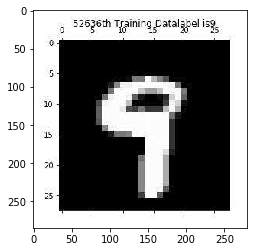

In [55]:
np.set_printoptions(precision=3)
# display function
def display(alist, show = True):
    print('type:%s\nshape: %s' %(alist[0].dtype,alist[0].shape))
    if show:
        for i in range(3):
            print('example%s\n%s' %(i,alist[i]))
            
scalars = np.array([1,2,3],dtype=int64)
print('\nscalar')
display(scalars)

vectors = np.array([[0.1,0.1,0.1],
                   [0.2,0.2,0.2],
                   [0.3,0.3,0.3]],dtype=float32)
print('\nvector')
display(vectors)

matrices = np.array([np.array((vectors[0],vectors[0])),
                    np.array((vectors[1],vectors[1])),
                    np.array((vectors[2],vectors[2]))],dtype=float32)
print('\nmatrix')
display(matrices)

# shape of image：(285, 280, 3)
img=mpimg.imread('timg.jpg') 
tensors = np.array([img,img,img])
# show image
print('\n3D-tensor')
display(tensors, show = False)
plt.imshow(img)

## write tfrecord

In [68]:
# open TFRecord file
writer = tf.python_io.TFRecordWriter('%s.tfrecord' %'test')

# we are going to write 3 examples，each example has 4 features：scalar, vector, matrix, tensor
for i in range(3):
    # create dictionary 
    features={}
    # write scalar ，type Int64，"value=[scalars[i]]" makes it to list
    features['scalar'] = tf.train.Feature(int64_list=tf.train.Int64List(value=[scalars[i]]))
    
    # write vector，type float，it is list，so "value=vectors[i]"
    features['vector'] = tf.train.Feature(float_list = tf.train.FloatList(value=vectors[i]))
    
    # write matrix，type float，but its rank =2，tf.train.FloatList only takes list, so we can flatten it to list
    features['matrix'] = tf.train.Feature(float_list = tf.train.FloatList(value=matrices[i].reshape(-1)))
    # however the shape info will disappear. we can save shape as vector here
    features['matrix_shape'] = tf.train.Feature(int64_list = tf.train.Int64List(value=matrices[i].shape))
    
    # write tensor，type float，rank =3，another way is to convert it to string
    features['tensor']         = tf.train.Feature(bytes_list=tf.train.BytesList(value=[tensors[i].tostring()]))
    # save shape (806,806,3)
    features['tensor_shape'] = tf.train.Feature(int64_list = tf.train.Int64List(value=tensors[i].shape))
  
    # feed dictionary to tf.train.Features
    tf_features = tf.train.Features(feature= features)
    # get an example
    tf_example = tf.train.Example(features = tf_features)
    # serialize the example
    tf_serialized = tf_example.SerializeToString()
    # write
    writer.write(tf_serialized)
# close  
writer.close()

# import tfrecord files to dataset

In [69]:
# create dataset from multiple tfrecord files
filenames = ["test.tfrecord", "test.tfrecord"]
dataset = tf.data.TFRecordDataset(filenames)

In [70]:
# collect all data info
data_info = pd.DataFrame({'name':['scalar','vector','matrix','matrix_shape','tensor','tensor_shape'],
                         'type':[scalars[0].dtype,vectors[0].dtype,matrices[0].dtype,tf.int64, tensors[0].dtype,tf.int64],
                         'shape':[scalars[0].shape,(1,3),matrices[0].shape,(len(matrices[0].shape),),tensors[0].shape,(len(tensors[0].shape),)],
                         'isbyte':[False,False,True,False,False,False],
                         'length_type':['fixed','fixed','var','fixed','fixed','fixed']},
                         columns=['name','type','shape','isbyte','length_type','default'])

In [71]:
data_info

,name,type,shape,isbyte,length_type,default
0,scalar,int64,(),False,fixed,NaN
1,vector,float32,"(1, 3)",False,fixed,NaN
2,matrix,float32,"(2, 3)",True,var,NaN
3,matrix_shape,<dtype: 'int64'>,"(2,)",False,fixed,NaN
4,tensor,uint8,"(285, 280, 3)",False,fixed,NaN
5,tensor_shape,<dtype: 'int64'>,"(3,)",False,fixed,NaN


## create parse function

In [72]:
def parse_function(example_proto):
    # example_proto，tf_serialized
    dics = {'scalar': tf.FixedLenFeature(shape=(), dtype=tf.int64, default_value=None), 
             
            # when parse the example, shape below can be used as reshape, for example reshape (3,) to (1,3)
            'vector': tf.FixedLenFeature(shape=(1,3), dtype=tf.float32), 
            
            # we can use VarLenFeature, but it returns SparseTensor
            'matrix': tf.VarLenFeature(dtype=dtype('float32')), 
            'matrix_shape': tf.FixedLenFeature(shape=(2,), dtype=tf.int64), 
            
            # tensor在写入时 使用了toString()，shape是()
            # we first set the type as tf.string, then change to its original type: tf.uint8
            'tensor': tf.FixedLenFeature(shape=(), dtype=tf.string), 
            'tensor_shape': tf.FixedLenFeature(shape=(3,), dtype=tf.int64)}
    # parse all features in a single example according to the dics
    parsed_example = tf.parse_single_example(example_proto, dics)
    # decode string
    parsed_example['tensor'] = tf.decode_raw(parsed_example['tensor'], tf.uint8)
    # sparse_tensor_to_dense
    parsed_example['matrix'] = tf.sparse_tensor_to_dense(parsed_example['matrix'])
    
    # reshape matrix
    parsed_example['matrix'] = tf.reshape(parsed_example['matrix'], parsed_example['matrix_shape'])
    
    # reshape tensor
    parsed_example['tensor'] = tf.reshape(parsed_example['tensor'], parsed_example['tensor_shape'])
    return parsed_example


## iterate example from dataset

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
==============example 1 ==============
scalar: value: 1 | shape: () | type: int64
vector shape: (1, 3) | type: float32
matrix shape: (2, 3) | type: float32
tensor shape: (285, 280, 3) | type: uint8
==============example 2 ==============
scalar: value: 2 | shape: () | type: int64
vector shape: (1, 3) | type: float32
matrix shape: (2, 3) | type: float32
tensor shape: (285, 280, 3) | type: uint8
==============example 3 ==============
scalar: value: 3 | shape: () | type: int64
vector shape: (1, 3) | type: float32
matrix shape: (2, 3) | type: float32
tensor shape: (285, 280, 3) | type: uint8
==============example 4 ==============
scalar: value: 1 | shape: () | type: int64
vector shape: (1, 3) | type: float32
matrix shape: (2, 3) | type: float32
tensor shape: (285, 280, 3) | type: uint8
==============example 5 ==============
scalar: value: 2 | shape: () | type: int64
vector shape: (1, 3) | type

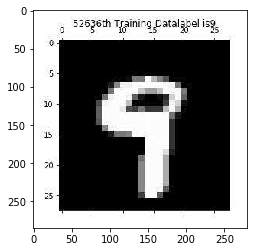

In [73]:
new_dataset = dataset.map(parse_function)
iterator = new_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

sess = tf.InteractiveSession()

i = 1
while True:
    # 
    try:
        scalar,vector,matrix,tensor = sess.run([next_element['scalar'],
                                                next_element['vector'],
                                                next_element['matrix'],
                                                next_element['tensor']])
    except tf.errors.OutOfRangeError:
        print("End of dataset")
        break
    else:
        print('==============example %s ==============' %i)
        print('scalar: value: %s | shape: %s | type: %s' %(scalar, scalar.shape, scalar.dtype))
        print('vector shape: %s | type: %s' %(vector.shape, vector.dtype))
        print('matrix shape: %s | type: %s' %(matrix.shape, matrix.dtype))
        print('tensor shape: %s | type: %s' %(tensor.shape, tensor.dtype))
    i+=1
plt.imshow(tensor)

## shuffle

### 可以轻松使用.shuffle(buffer_size= ) 来打乱顺序。buffer_size设置成一个大于你数据集中样本数量的值来确保其充分打乱。 

In [74]:
shuffle_dataset = new_dataset.shuffle(buffer_size=10000)
iterator = shuffle_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

i = 1
while True:
    try:
        scalar = sess.run(next_element['scalar'])
    except tf.errors.OutOfRangeError:
        print("End of dataset")
        break
    else:
        print('example %s | scalar: value: %s' %(i,scalar))
    i+=1

example 1 | scalar: value: 3
example 2 | scalar: value: 2
example 3 | scalar: value: 1
example 4 | scalar: value: 1
example 5 | scalar: value: 2
example 6 | scalar: value: 3
End of dataset


## Batch

再从乱序后的数据集上进行batch。

In [75]:
batch_dataset = shuffle_dataset.batch(4)
iterator = batch_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

i = 1
while True:
    # 不断的获得下一个样本
    try:
        scalar = sess.run(next_element['scalar'])
    except tf.errors.OutOfRangeError:
        print("End of dataset")
        break
    else:
        print('example %s | scalar: value: %s' %(i,scalar))
    i+=1

example 1 | scalar: value: [1 3 1 2]
example 2 | scalar: value: [2 3]
End of dataset


## batch and padding

也可以在每个batch内进行padding,padded_shapes指定了内部数据是如何pad的。
* rank数要与元数据对应
* rank中的任何一维被设定成None或-1时都表示将pad到该batch下的最大长度

In [77]:
batch_padding_dataset = new_dataset.padded_batch(4, 
                        padded_shapes={'scalar': [],
                                       'vector': [-1,5],
                                       'matrix': [None,None],
                                       'matrix_shape': [None],
                                       'tensor': [None,None,None],
                                       'tensor_shape': [None]})
iterator = batch_padding_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

i = 1
while True:
    try:
        scalar,vector,matrix,tensor = sess.run([next_element['scalar'],
                                                next_element['vector'],
                                                next_element['matrix'],
                                                next_element['tensor']])
    except tf.errors.OutOfRangeError:
        print("End of dataset")
        break
    else:
        print('==============example %s ==============' %i)
        print('scalar: value: %s | shape: %s | type: %s' %(scalar, scalar.shape, scalar.dtype))
        print('padded vector value\n%s:\nvector shape: %s | type: %s' %(vector, vector.shape, vector.dtype))
        print('matrix shape: %s | type: %s' %(matrix.shape, matrix.dtype))
        print('tensor shape: %s | type: %s' %(tensor.shape, tensor.dtype))
    i+=1

==============example 1 ==============
scalar: value: [1 2 3 1] | shape: (4,) | type: int64
padded vector value
[[[0.1 0.1 0.1 0.  0. ]]

 [[0.2 0.2 0.2 0.  0. ]]

 [[0.3 0.3 0.3 0.  0. ]]

 [[0.1 0.1 0.1 0.  0. ]]]:
vector shape: (4, 1, 5) | type: float32
matrix shape: (4, 2, 3) | type: float32
tensor shape: (4, 285, 280, 3) | type: uint8
==============example 2 ==============
scalar: value: [2 3] | shape: (2,) | type: int64
padded vector value
[[[0.2 0.2 0.2 0.  0. ]]

 [[0.3 0.3 0.3 0.  0. ]]]:
vector shape: (2, 1, 5) | type: float32
matrix shape: (2, 2, 3) | type: float32
tensor shape: (2, 285, 280, 3) | type: uint8
End of dataset


## epoch

In [76]:
num_epochs = 2
epoch_dataset = new_dataset.repeat(num_epochs)
iterator = epoch_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

i = 1
while True:
    try:
        scalar = sess.run(next_element['scalar'])
    except tf.errors.OutOfRangeError:
        print("End of dataset")
        break
    else:
        print('example %s | scalar: value: %s' %(i,scalar))
    i+=1

example 1 | scalar: value: 1
example 2 | scalar: value: 2
example 3 | scalar: value: 3
example 4 | scalar: value: 1
example 5 | scalar: value: 2
example 6 | scalar: value: 3
example 7 | scalar: value: 1
example 8 | scalar: value: 2
example 9 | scalar: value: 3
example 10 | scalar: value: 1
example 11 | scalar: value: 2
example 12 | scalar: value: 3
End of dataset
